<a href="https://colab.research.google.com/github/asafdari-boop/ComputationalPhyiscsLibrary/blob/main/InterpolationCurveFitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use Lagrange polynomials for interpolation

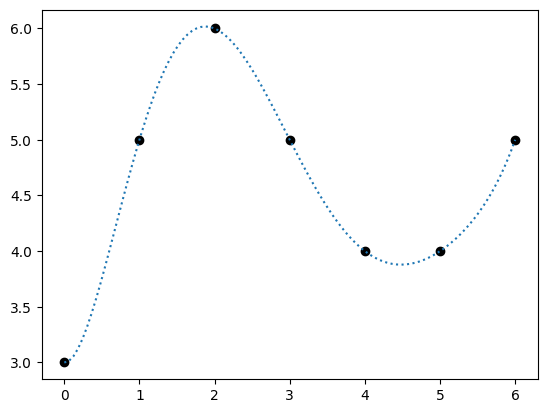

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# use the matplotlib's internal default plot style
plt.rcdefaults()

# Lagrange polynomials for a given index k
def lagrange_poly(x, xp, k):
    l = None
    # sum over points
    for m in range(len(xp)):
        if m == k:
            continue
            
        if l == None:
            l = (x - xp[m])/(xp[k] - xp[m])
        else:
            l *= (x - xp[m])/(xp[k] - xp[m])    
    return l

# Interpolation for a given x value using Lagrange polynomials
def lagrange_interpolate(x, xp, yp):
  interp = 0.
  for k in range(len(xp)):
    interp += lagrange_poly(x, xp, k)*yp[k]
  return interp

# make plots
X = [0., 1., 2., 3., 4., 5., 6.]
Y = [3., 5., 6., 5., 4., 4., 5.]
plt.scatter(X, Y, c='k')

xx = np.linspace(0, 6, 100)
yy = []
for i in range(len(xx)):
  yy.append(lagrange_interpolate(xx[i], X, Y)) 
plt.plot(xx, yy, linestyle=':')
plt.show()

# Newton's polynomials

Newton’s polynomial interpolation is another popular way to fit exactly for a set of data points. The general form of the an $n$ order Newton’s polynomial that goes through $n+1$ points [$(x_0, y_0)$, ..., $(x_n, y_n)$] is:

$f(x)=a_0+a_1(x−x_0)+a_2(x−x_0)(x−x_1)+⋯+a_n(x−x_0)(x−x_1)…(x−x_{n-1})$

which can be re-written as:
$f(x)=\sum_{i=0}^n a_i N_i(x)$

where $N_i(x)=\Pi_{j=0}^{i−1}(x−x_j)$

The special feature of the Newton’s polynomial is that the coefficients ai can be determined using a very simple mathematical procedure. For example, since the polynomial goes through each data points, therefore, for a data points $(x_i,y_i)$, we will have $f(x_i)=y_i$, thus we have

$f(x_0)=a_0=y_0$

And $f(x_1)=a_0+a_1(x_1−x_0)=y_1$, by rearranging it to get $a_1$, we will have:

$a_1=\frac{y_1−y_0}{x_1−x_0}$

Now, insert data points $(x_2,y_2)$, we can calculate $a_2$, and it is in the form:

$a_2=\frac{\frac{y_2−y_1}{x_2−x_1}−\frac{y_1−y_0}{x_1−x_0}}{x_2−x_0}$


Let’s do one more data points $(x_3,y_3)$ to calculate $a_3$, after insert the data point into the equation, we get:

$a_3=\frac{\frac{\frac{y_3−y_2}{x_3−x_2} − \frac{y_2−y_1}{x_2−x_1}}{x_3−x_1} −  \frac{\frac{y_2−y_1}{x_2−x_1} − \frac{y_1−y_0}{x_1−x_0}}{x_2−x_0}}{x_3−x_0}$

Now, see the patterns? These are called **divided differences**, if we define:

$f[x_1,x_0]=\frac{y_1−y_0}{x_1−x_0}$

$f[x_2,x_1,x_0]=\frac{\frac{y_2−y_1}{x_2−x_1}−\frac{y_1−y_0}{x_1−x_0}}{x_2−x_0}=\frac{f[x_2,x_1]−f[x_1,x_0]}{x_2−x_0}$

We continue write this out, we will have the following iteration equation:

$f[x_k,x_{k−1},…,x_1,x_0]=\frac{f[x_k,x_{k−1},…,x_2,x_1]−f[x_{k−1},x_{k−2},…,x_1,x_0]}{x_k−x_0}$

We can see one beauty of the method is that, once the coefficients are determined, adding new data points won’t change the calculated ones, we only need to calculate higher differences continues in the same manner. The whole procedure for finding these coefficients can be summarized into a divided differences table. Let’s see an example using 5 data points:

|      |           |           |           |             | 
| --- | --- | --- | --- | --- |
| $x_0$   $y_0$ |  |  | | | 
|  | $f[x_1, x_0]$ |  | | | 
| $x_1$   $y_1$ |  | $f[x_2, x_1, x_0]$ | | | 
|  | $f[x_2, x_1]$ |  | $f[x_3, x_2, x_1, x_0]$ | | 
| $x_2$   $y_2$ |  | $f[x_3, x_2, x_1]$ | | $f[x_4, x_3, x_2, x_1, x_0]$ | 
|  | $f[x_3, x_2]$ |  | $f[x_4, x_3, x_2, x_1]$ | | 
| $x_3$   $y_3$ |  | $f[x_4, x_3, x_2]$ | | | 
|  | $f[x_4, x_3]$ |  | | | 
| $x_4$   $y_4$ |  | | | | 

Each element in the table can be calculated using the two previous elements (to the left). In reality, we can calculate each element and store them into a diagonal matrix, that is the coefficients matrix can be write as:

|      |           |           |           |             | 
| --- | --- | --- | --- | --- |
| $y_0$ | $f[x_1, x_0]$ | $f[x_2, x_1, x_0]$ | $f[x_3, x_2, x_1, x_0]$ | $f[x_4, x_3, x_2, x_1, x_0]$ | 
| $y_1$ | $f[x_2, x_1]$ | $f[x_3, x_2, x_1]$ | $f[x_4, x_3, x_2, x_1]$ | $0$ | 
| $y_2$ | $f[x_3, x_2]$ | $f[x_4, x_3, x_2]$ | $0$ | $0$ | 
| $y_3$ | $f[x_4, x_3]$ | $0$ | $0$ | $0$ | 
| $y_4$ | $0$ | $0$ | $0$ | $0$ | 

Note that, the first row in the matrix is actually all the coefficients that we need, i.e. $a_0$, $a_1$, $a_2$, $a_3$, $a_4$. 

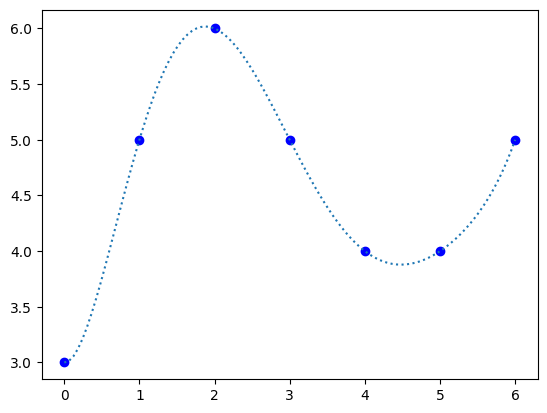

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# create the divided difference table
# https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.05-Newtons-Polynomial-Interpolation.html
def divided_diff(x, y):
    n = len(y)
    coeff = np.zeros([n, n])
    coeff[:,0] = y  # the first column is y
    
    for j in range(1, n):
        for i in range(n-j):
            coeff[i][j] = (coeff[i+1][j-1] - coeff[i][j-1]) / (x[i+j]-x[i])
    return coeff

# evaluate the newton polynomial at a given x value
def newton_poly(coeff, x_data, x):
    n = len(x_data)-1 
    
    p = coeff[n]
    for k in range(1, n+1):
        p = coeff[n-k] + (x -x_data[n-k])*p
    return p

x = [0.,1.,2.,3.,4.,5.,6.]
y = [3.,5.,6.,5.,4.,4.,5.]
plt.plot(x, y, 'bo')

# get the divided difference coeff from the first row which are a0, a1, a2, ...
coeff = divided_diff(x, y)[0, :]

x_new = np.linspace(0, 6, 100)
y_new = newton_poly(coeff, x, x_new)
plt.plot(x_new, y_new, ":")
plt.show()

# Cubic spline

Instead of fitting a single, high-degree polynomial to all of the values at once, spline interpolation fits low-degree polynomials to small subsets of the values. Spline interpolation is often preferred over polynomial interpolation because the interpolation error can be made small even when using low-degree polynomials for the spline. Spline interpolation also avoids the problem of Runge's phenomenon, in which oscillation can occur between points when interpolating using high-degree polynomials.

Given $n+1$ pairs of data points $(x_i, y_i)$ with $i=0, 1, ..., n$, find a piecewise-cubic polynomial $s(x)$:

$s_0(x) = a_0 + b_0(x-x_0) + c_0(x-x_0)^2 + d_0(x-x_0)^3$ for $x_0 \le x \le x_1$

$s_1(x) = a_1 + b_1(x-x_1) + c_1(x-x_1)^2 + d_1(x-x_1)^3$ for $x_1 \le x \le x_2$

...

$s_{n-1}(x) = a_{n-1} + b_{n-1}(x-x_{n-1}) + c_{n-1}(x-x_{n-1})^2 + d_{n-1}(x-x_{n-1})^3$ for $x_{n-1} \le x \le x_n$

that is $s_i(x) = a_i + b_i(x-x_i) + c_i(x-x_i)^2 + d_i(x-x_i)^3$ for $x_i \le x \le x_{i+1}$

Conditions:

(1) $s(x_i) = y_i$ with $i=0, 1, ..., n$

(2) $s_i(x_{i+1})=s_{i+1}(x_{i+1})$ with $i=0, 1, ..., n-2$

(3) $s'_i(x_{i+1})=s'_{i+1}(x_{i+1})$ with $i=0, 1, ..., n-2$

(4) $s''_i(x_{i+1})=s''_{i+1}(x_{i+1})$ with $i=0, 1, ..., n-2$

Need to have two more conditions to solve these $4n$ unknonwns:

(5) Natural spline:  $s''_0(x_0)=0$ and $s''_{n-1}(x_n)=0$  OR 

Clamped spline:  $s''_0(x_0)=\alpha$ and $s''_{n-1}(x_n)=\beta$  

Define $h_i = x_{i+1} - x_i$ with $i=0, 1,, ..., n-1$ and

$$
a_{n \times 1} = \left(\begin{array}{cc} 
y_0 \\
y_1 \\
... \\
y_{n-1}
\end{array}\right)
$$

$$
b_{n \times 1} = \left(\begin{array}{cc} 
b_0 \\
b_1 \\
... \\
b_{n-1}
\end{array}\right)
$$

$$
c_{(n+1) \times 1} = \left(\begin{array}{cc} 
c_0 \\
c_1 \\
... \\
c_{n-1} \\
0
\end{array}\right)
$$

We can solve an equation $A c  = \nu$ to find the matrix $c$, once we have $c$ we can find $a$, $b$ and $d$

For the natural spline:
$
A_{(n+1)\times(n+1)} = \begin{bmatrix}
1 & 0 & 0 & 0 & ... & 0 & 0 & 0 \\
h_0 & 2(h_0+h_1) & h_1 & 0 & ... & 0 & 0 & 0 \\
0 & h_1 & 2(h_1+h_2) & h_2 & ... & 0 & 0 & 0 \\
... & ... & ... & ... & ... & ... & ... & ... \\
0 & 0 & 0 & 0 & ... & h_{n-2} & 2(h_{n-2}+h_{n-1}) & h_{n-1} \\
0 & 0 & 0 & 0 & ... & 0 & 0 & 1 \\
\end{bmatrix}
$

$
\nu_{(n+1)\times1} = \begin{bmatrix}
0 \\
3[(y_2-y_1)/h_1 - (y_1-y_0)/h_0] \\
3[(y_3-y_2)/h_2 - (y_2-y_1)/h_1] \\
... \\
3[(y_n-y_{n-1})/h_{n-1} - (y_{n-1}-y_{n-2})/h_{n-2}] \\
0
\end{bmatrix}
$

one we find $c$, we have
$b_i = (a_{i+1}-a_{i})/h_i - (2c_i+c_{i+1})h_i/3$ with $i=0, 1, ..., n-1$ and $d_i = (c_{i+1}-c_i)/3h_i$ with $i=0, 1, ..., n-1$ 



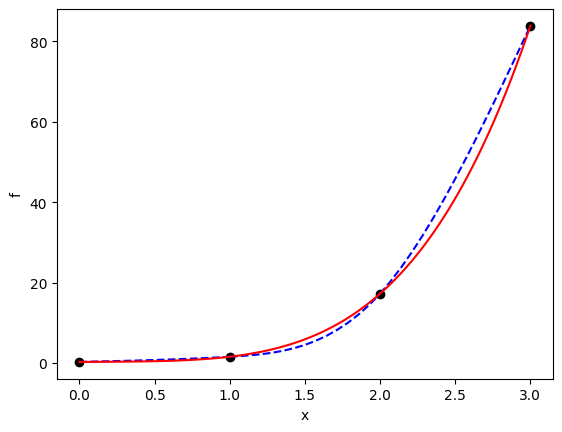

In [ ]:
import math  
import matplotlib.pyplot as plt
import numpy as np

def cubic_spline(x, y):
  """
  https://trinket.io/python/0793687aa3
  another example: http://bender.astro.sunysb.edu/classes/phy688_spring2013/examples/cubic-spline.py
  A*c = v
  """
  n = len(x) - 1
  h = [x[i+1]-x[i] for i in range(n)]
  vl = [3*((y[i+1]-y[i])/h[i] - (y[i]-y[i-1])/h[i-1]) for i in range(1, n)]
  vl.insert(0, 0)  # insert 0 at the beginning
  
  l = [1] * (n+1)
  u = [0] * (n+1)
  z = [0] * (n+1)
  for i in range(1, n):
    l[i] = 2*(x[i+1]-x[i-1]) - h[i-1]*u[i-1]
    u[i] = h[i]/l[i]
    z[i] = (vl[i] - h[i-1]*z[i-1])/l[i]

  b = [0] * (n+1)
  c = [0] * (n+1)
  d = [0] * (n+1)

  for i in range(n-1, -1, -1):    #for i in reversed(range(n)):
    c[i] = z[i] - u[i]*c[i+1]  # solve matrix equation
    b[i] = (y[i+1]-y[i])/h[i] - h[i]*(c[i+1] + 2*c[i])/3
    d[i] = (c[i+1]-c[i])/(3*h[i])

  # list all parameters a(=y), b, c, d to a matrix
  return [y, b, c, d]
  
if __name__ == '__main__':
  # the function to be interpolated
  def f(x):
    return x**4 + np.exp(x)/(x+4)
    
  # input
  interval = 3
  x = [i for i in range(interval + 1)]
  y = [f(i) for i in range(interval + 1)]

  # process
  coeff = cubic_spline(x, y)

  # prepare data for plotting the splines
  points_per_interval = 15
  xs = []
  ys = []
  for i in range(3):
    xs.append(np.linspace(i, i+1, points_per_interval))   # divide each interval into smaller sub-intervals
    ys.append([coeff[0][i] +                              # a+b*(x-xi)+c*(x-xi)*(x-xi)+d*(x-xi)*(x-xi)*(x-xi)
               coeff[1][i]*(xs[i][k]-i) + 
               coeff[2][i]*(xs[i][k]-i)**2 + 
               coeff[3][i]*(xs[i][k]-i)**3   
               for k in range(points_per_interval)])

  # black curve indicates the actual curve
  plt.plot(x, y, 'ko', xs[0], ys[0], 'b--', xs[1], ys[1], 'b--', xs[2], ys[2], 'b--')

  # plot the real function
  x_func = np.linspace(0, 3, 100)
  y_func = f(x_func)
  plt.plot(x_func, y_func, "r")

  plt.xlabel('x')
  plt.ylabel('f')
  plt.show()

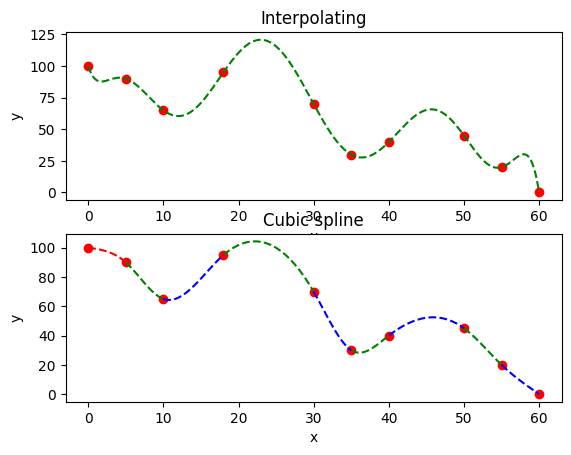

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

xd = (0, 5, 10, 18, 30, 35, 40, 50, 55, 60)
yd = (100, 90, 65, 95, 70, 30, 40, 45, 20, 0)

# process
coeff = cubic_spline(xd, yd)

# prepare data for plotting the splines
points_per_interval = 20
xs = []
ys = []
for i in range(9):
  xs.append(np.linspace(xd[i], xd[i+1], points_per_interval))   # divide each interval into smaller sub-intervals
  ys.append([coeff[0][i] +                              # a+b*(x-xi)+c*(x-xi)*(x-xi)+d*(x-xi)*(x-xi)*(x-xi)
             coeff[1][i]*(xs[i][k]-xd[i]) + 
             coeff[2][i]*(xs[i][k]-xd[i])**2 + 
             coeff[3][i]*(xs[i][k]-xd[i])**3   
             for k in range(points_per_interval)])

##################################
# interpolating
##################################
plt.subplot(211)
plt.title("Interpolating")
plt.plot(xd, yd, 'ro')

# get the divided difference coeff from the first row which are a0, a1, a2, ...
coeff = divided_diff(xd, yd)[0, :]

x_new = np.linspace(0, 60, 600)
y_new = newton_poly(coeff, xd, x_new)
plt.plot(x_new, y_new, "g--")
plt.xlabel('x')
plt.ylabel('y')

##################################
# cubic spline
##################################
plt.subplot(212)

plt.title("Cubic spline")
plt.plot(xd, yd, 'ro')
plt.plot(xs[0], ys[0], 'r--', xs[1], ys[1], 'g--', xs[2], ys[2], 'b--', xs[3], ys[3], 'g--', xs[4], ys[4], 'b--', xs[5], ys[5], 'g--', xs[6], ys[6], 'b--', xs[7], ys[7], 'g--', xs[8], ys[8], 'b--')

plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Least Squares Regression

for n points, $y(x_i)=\alpha x_i + \beta$ with $i=1, 2, ..., n$

by minimizing the error $R=\sum_{i=1}^n [y_i-y(x_i)]^2$, we have

$$
\left(\begin{array}{cc} 
\sum_{i=1}^n x_i^2 & \sum_{i=1}^n x_i\\
\sum_{i=1}^n x_i & n
\end{array}\right)
\left(\begin{array}{cc} 
\alpha\\ 
\beta 
\end{array}\right) = 
\left(\begin{array}{cc} 
\sum_{i=1}^n x_i y_i\\ 
\sum_{i=1}^n y_i
\end{array}\right)
$$

[[3.30354484]
 [1.99799369]]


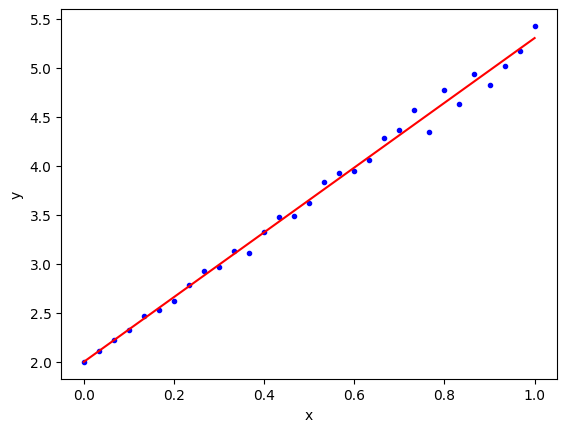

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# generate x and y randomly
# the slope is 3 and the intercept is 2
x = np.linspace(0, 1, 31)
y = 2 + 3*x + 0.5 * x * np.random.random(len(x))

x2 = x*x
xy = x*y
x2_sum = x2.sum()
xy_sum = xy.sum()
x_sum = x.sum()
y_sum = y.sum()

A = np.matrix([[x2_sum, x_sum], [x_sum, len(x)]])
B = np.matrix([[xy_sum], [y_sum]])
param = np.dot(np.linalg.inv(A), B)
print(param)

#np.linalg.inv(np.dot(A.T,A)),A.T)),y)

# plot the results
plt.plot(x, y, 'b.')
plt.plot(x, param.item(0)*x + param.item(1), 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**can also use the gradient descent method to find the slope and the intercept**

Iteration 1: Cost 176.58261494718366, Weight 2.7518485417025182, Bias 0.4845340763537687
Iteration 2: Cost 98.46526444431659, Weight 2.939173941276489, Bias 0.8389764832665318
Iteration 3: Cost 54.96343309950776, Weight 3.0783586008547252, Bias 1.1037978688393453
Iteration 4: Cost 30.737775190719685, Weight 3.1816274949487107, Bias 1.3017365113397723
Iteration 5: Cost 17.246357341383458, Weight 3.2581031886373943, Bias 1.4497605359307155
Iteration 6: Cost 9.732481812546075, Weight 3.3145931272947506, Bias 1.5605321862346015
Iteration 7: Cost 5.54731311775167, Weight 3.35617713841272, Bias 1.6435005126119748
Iteration 8: Cost 3.215808827639808, Weight 3.3866458450282897, Bias 1.7057167726020765
Iteration 9: Cost 1.9165698704360838, Weight 3.4088278244186827, Bias 1.7524429099326009
Iteration 10: Cost 1.1921877830250502, Weight 3.42483374480623, Bias 1.7876056218579812
Iteration 11: Cost 0.7879474629309889, Weight 3.436238548286083, Bias 1.8141351993595307
Iteration 12: Cost 0.5620065041

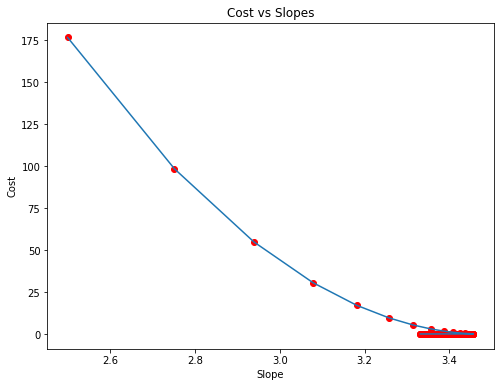

Estimated Slope: 3.331363777352244
Estimated Intercept: 1.9665683526135482


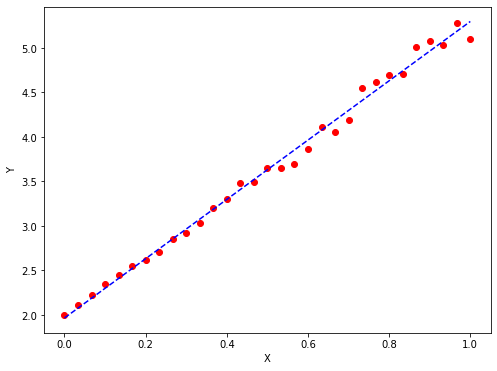

In [ ]:
# example code taken from https://www.geeksforgeeks.org/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum/

import numpy as np
import matplotlib.pyplot as plt

# define the loss or cost function
def mean_squared_error(y_true, y_predicted):
	cost = np.sum((y_true-y_predicted)**2)
	return cost

# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold are hyperparameters that can be tuned
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.1, stopping_threshold = 1e-5):
	
	# Initializing slope, intercept, learning rate and iterations
	current_slope = 2.5
	current_intercept = 0.01
	iterations = iterations
	learning_rate = learning_rate
	n = float(len(x))
	
	costs = []
	slopes = []
	previous_cost = None
	
	# Estimation of optimal parameters
	for i in range(iterations):
		
		# Making predictions
		y_predicted = (current_slope * x) + current_intercept
		
		# Calculationg the current cost
		current_cost = mean_squared_error(y, y_predicted)

		# If the change in cost is less than or equal to
		# stopping_threshold we stop the gradient descent
		if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold:
			break
		
		previous_cost = current_cost

		costs.append(current_cost)
		slopes.append(current_slope)
		
		# Calculating the gradients
		slope_derivative = -(2/n) * sum(x * (y-y_predicted))
		intercept_derivative = -(2/n) * sum(y - y_predicted)
		
		# Updating slopes and intercept
		current_slope = current_slope - (learning_rate * slope_derivative)
		current_intercept = current_intercept - (learning_rate * intercept_derivative)
				
		# Printing the parameters for each iteration
		print(f"Iteration {i+1}: Cost {current_cost}, Weight {current_slope}, Bias {current_intercept}")
	
	# Visualizing the weights and cost at for all iterations
	plt.figure(figsize = (8,6))
	plt.plot(slopes, costs)
	plt.scatter(slopes, costs, marker='o', color='red')
	plt.title("Cost vs Slopes")
	plt.ylabel("Cost")
	plt.xlabel("Slope")
	plt.show()
	
	return current_slope, current_intercept

##############################################
# Data
# generate x and y randomly
# the slope is 3 and the intercept is 2
X = np.linspace(0, 1, 31)
Y = 2 + 3*X + 0.5 * X * np.random.random(len(X))

# Estimating slope and intercept using gradient descent
estimated_slope, eatimated_intercept = gradient_descent(X, Y, iterations=2000)
print(f"Estimated Slope: {estimated_slope}\nEstimated Intercept: {eatimated_intercept}")

# Making predictions using estimated parameters
Y_pred = estimated_slope*X + eatimated_intercept

# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X, Y, marker='o', color='red')
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue', markerfacecolor='red', markersize=10, linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## For general functions

Recall that if we enumerate the estimation of the data at each data point, $x_i$, this gives us the following system of equations:

$\hat{y}(x_1)=\alpha_1 f_1(x_1)+\alpha_2 f_2(x_1)+ \cdots + \alpha_n f_n(x_1)$

$\hat{y}(x_2)=\alpha_1 f_1(x_2)+\alpha_2 f_2(x_2)+ \cdots + \alpha_n f_n(x_2)$

$\cdots$

$\hat{y}(x_m)=\alpha_1 f_1(x_m)+\alpha_2 f_2(x_m)+ \cdots + \alpha_n f_n(x_m)$

Define 
$A = [f_1(x_i), f_2(x_i), \cdots, f_n(x_i)]$, $Y=[y_1, y_2, \cdots, y_n]^T$ and $\alpha=[\alpha_1, \alpha_2, \cdots, \alpha_n]^T$. 

Use the least square regression we have:

$\alpha=(A^TA)^{−1}A^TY$.

[[3.30098162]
 [1.98609619]]


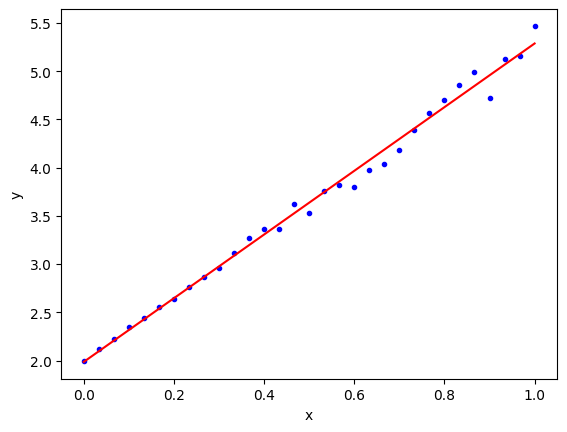

In [ ]:
# from https://pythonnumericalmethods.berkeley.edu/notebooks/chapter16.04-Least-Squares-Regression-in-Python.html

import numpy as np
import matplotlib.pyplot as plt

# generate x and y randomly, will be different from the example shown above
x = np.linspace(0, 1, 31)
y = 2 + 3*x + 0.5 * x * np.random.random(len(x))
y = y[:, np.newaxis]  # turn y into a column vector

# assemble matrix A
# the fitted function will be f = alpha_0 * x + alpha_1 * 1
# so the first row will be x and the second row will be 1
A = np.vstack([x, np.ones(len(x))]).T

# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)), y)
print(alpha)

# plot the results
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Here we fit random numbers generated with a $sin(x)$ curve with a 3-rd order polynomial function**

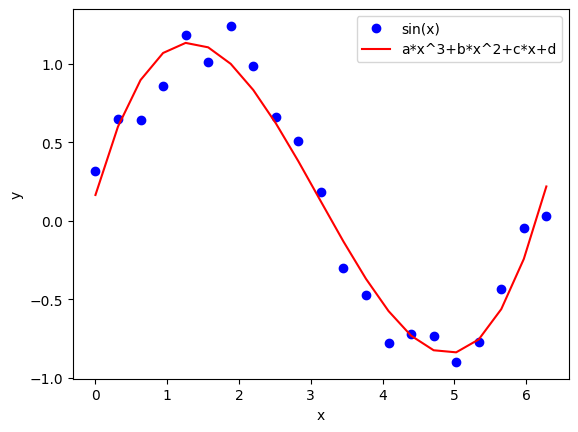

In [ ]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt

x = np.linspace(0, 2*pi, 21)
y = np.sin(x) + 0.4*np.random.random(len(x))
y = y[:, np.newaxis]  # turn y into a column vector

# assemble matrix A
# the fitted function will be f = alpha_0 * x^3 + alpha_1 * x^2 + alpha_2 * x + alpha_3 * 1
# so the rows are x^3, x^2, x^1, 1
A = np.vstack([x*x*x, x*x, x, np.ones(len(x))]).T

# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)

# plot the results
plt.plot(x, y, marker='o', color='b', linestyle='None', label='sin(x)')
plt.plot(x, alpha[0]*x*x*x + alpha[1]*x*x + alpha[2]*x + alpha[3], label='a*x^3+b*x^2+c*x+d', color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()